# Load and Visualize Pascal Dataset

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from importlib.util import find_spec
if find_spec("model") is None:
    import sys
    sys.path.append('..')

In [7]:
from fastai.vision.all import *

In [8]:
path = untar_data(URLs.PASCAL_2007)

A new version of this dataset is available, downloading...


In [9]:
path.ls()

(#8) [Path('/home/kmh/.fastai/data/pascal_2007/train'),Path('/home/kmh/.fastai/data/pascal_2007/train.json'),Path('/home/kmh/.fastai/data/pascal_2007/test.json'),Path('/home/kmh/.fastai/data/pascal_2007/segmentation'),Path('/home/kmh/.fastai/data/pascal_2007/valid.json'),Path('/home/kmh/.fastai/data/pascal_2007/test.csv'),Path('/home/kmh/.fastai/data/pascal_2007/test'),Path('/home/kmh/.fastai/data/pascal_2007/train.csv')]

In [10]:
(path/"train").ls()

(#5012) [Path('/home/kmh/.fastai/data/pascal_2007/train/004246.jpg'),Path('/home/kmh/.fastai/data/pascal_2007/train/009794.jpg'),Path('/home/kmh/.fastai/data/pascal_2007/train/009881.jpg'),Path('/home/kmh/.fastai/data/pascal_2007/train/007390.jpg'),Path('/home/kmh/.fastai/data/pascal_2007/train/005303.jpg'),Path('/home/kmh/.fastai/data/pascal_2007/train/004931.jpg'),Path('/home/kmh/.fastai/data/pascal_2007/train/004168.jpg'),Path('/home/kmh/.fastai/data/pascal_2007/train/006838.jpg'),Path('/home/kmh/.fastai/data/pascal_2007/train/002783.jpg'),Path('/home/kmh/.fastai/data/pascal_2007/train/002096.jpg')...]

In [11]:
imgs, lbl_bbox = get_annotations(path/"train.json")

In [12]:
imgs[0]

'000012.jpg'

In [13]:
lbl_bbox[0]

([[155, 96, 351, 270]], ['car'])

We Want to be able to quickly look up an image's corresponding label.

In [14]:
img2bbox = dict(zip(imgs, lbl_bbox))

In [16]:
first = {k: img2bbox[k] for k in list(img2bbox)[:1]};
first

{'000012.jpg': ([[155, 96, 351, 270]], ['car'])}

## Building the Datablock

In [17]:
getters = [lambda o: path/"train"/o, lambda o: img2bbox[o][0], lambda o: img2bbox[o][1]]

In [44]:
item_tfms = [Resize(128, method="pad"),]
batch_tfms = [Rotate(), Flip(), Dihedral(), Normalize.from_stats(*imagenet_stats)]

In [45]:
def get_train_imgs(noop): return imgs

In [46]:
pascal = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                   splitter=RandomSplitter(),
                   get_items=get_train_imgs,
                   getters=getters,
                   item_tfms=item_tfms,
                   batch_tfms=batch_tfms,
                   n_inp=1)

In [47]:
dls = pascal.dataloaders(path/"train")

In [48]:
dls.c = 20

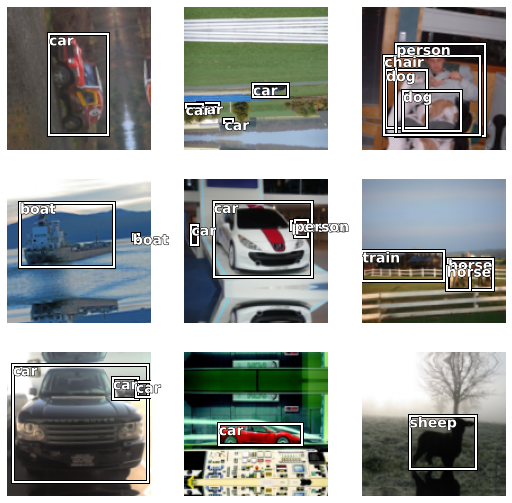

In [49]:
dls.show_batch()